In [42]:
# !pip install opencv-python
# !pip install matplotlib

In [43]:
import cv2

In [44]:
protoFile = "C:\\Users\\SIBSANKAR\\Desktop\\dev\\pose_deploy.prototxt"
weightsFile = "C:\\Users\\SIBSANKAR\\Desktop\\dev\\pose_iter_102000.caffemodel"
nPoints = 22

frame = cv2.imread("C:\\Users\\SIBSANKAR\\Desktop\\dev\\hand.jpg")
net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)
cv2.imshow('Output-Keypoints', frame)

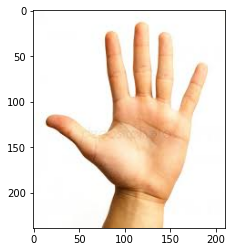

In [45]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
plt.show()

In [65]:
inHeight,inWidth,_ = frame.shape
frame.shape

(239, 211, 3)

In [66]:
inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (inWidth, inHeight),
                          (0, 0, 0), swapRB=False, crop=False)

net.setInput(inpBlob)

output = net.forward()

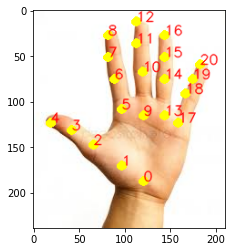

In [67]:
points = []
frameHeight,frameWidth,_=frame.shape
frameCopy=frame.copy()
threshold=.1
for i in range(nPoints):
    # confidence map of corresponding body's part.
    probMap = output[0, i, :, :]
    probMap = cv2.resize(probMap, (frameWidth, frameHeight))

    # Find global maxima of the probMap.
    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)

    if prob > threshold :
        cv2.circle(frameCopy, (int(point[0]), int(point[1])), 5, (0, 255, 255), thickness=-1, lineType=cv2.FILLED)
        cv2.putText(frameCopy, "{}".format(i), (int(point[0]), int(point[1])), cv2.FONT_HERSHEY_SIMPLEX, .5, (0, 0, 255), 1, lineType=cv2.LINE_AA)

        # Add the point to the list if the probability is greater than the threshold
        points.append((int(point[0]), int(point[1])))
    else :
        points.append(None)
cv2.imshow('Output-Keypoints', frameCopy)
plt.imshow(cv2.cvtColor(frameCopy, cv2.COLOR_BGR2RGB))
plt.show()

In [36]:
points

[(61, 72),
 (48, 68),
 (31, 61),
 (18, 53),
 (8, 49),
 (74, 53),
 (78, 42),
 (84, 34),
 (88, 24),
 (64, 49),
 (68, 31),
 (68, 23),
 (68, 12),
 (55, 46),
 (55, 27),
 (55, 16),
 (55, 5),
 (45, 46),
 (42, 28),
 (41, 20),
 (41, 9),
 None]

In [28]:
# Draw Skeleton
for pair in POSE_PAIRS:
    partA = pair[0]
    partB = pair[1]

    if points[partA] and points[partB]:
        cv2.line(frame, points[partA], points[partB], (0, 255, 255), 2)
        cv2.circle(frame, points[partA], 8, (0, 0, 255), thickness=-1, lineType=cv2.FILLED)

cv2.imshow('Output-Skeleton', frame)

NameError: name 'POSE_PAIRS' is not defined